In [4]:
!pip install mlxtend

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
# conda install -c conda-forge mlxtend

# Import libraries 

In [2]:
titanic = pd.read_csv("C:/Users/Computer/Downloads/Titanic.csv")
titanic.head()

,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No


# Pre-Processing
As the data is not in transaction formation 
We are using transaction Encoder

In [7]:
df=pd.get_dummies(titanic)
df.head()

,Class_1st,Class_2nd,Class_3rd,Class_Crew,Gender_Female,Gender_Male,Age_Adult,Age_Child,Survived_No,Survived_Yes
0,0,0,1,0,0,1,0,1,1,0
1,0,0,1,0,0,1,0,1,1,0
2,0,0,1,0,0,1,0,1,1,0
3,0,0,1,0,0,1,0,1,1,0
4,0,0,1,0,0,1,0,1,1,0


# Apriori Algorithm 

In [8]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.147660,(Class_1st)
1,0.129487,(Class_2nd)
2,0.320763,(Class_3rd)
3,0.402090,(Class_Crew)
4,0.213539,(Gender_Female)
5,0.786461,(Gender_Male)
6,0.950477,(Age_Adult)
7,0.676965,(Survived_No)
8,0.323035,(Survived_Yes)
9,0.144934,"(Class_1st, Age_Adult)"


In [9]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Class_1st),(Age_Adult),0.147660,0.950477,0.144934,0.981538,1.032680,0.004587,2.682493
1,(Age_Adult),(Class_1st),0.950477,0.147660,0.144934,0.152486,1.032680,0.004587,1.005694
2,(Class_2nd),(Age_Adult),0.129487,0.950477,0.118582,0.915789,0.963505,-0.004492,0.588085
3,(Age_Adult),(Class_2nd),0.950477,0.129487,0.118582,0.124761,0.963505,-0.004492,0.994601
4,(Class_3rd),(Gender_Male),0.320763,0.786461,0.231713,0.722380,0.918520,-0.020555,0.769177
...,...,...,...,...,...,...,...,...,...
101,"(Age_Adult, Survived_No)","(Class_Crew, Gender_Male)",0.653339,0.391640,0.304407,0.465925,1.189676,0.048533,1.139090
102,(Class_Crew),"(Gender_Male, Age_Adult, Survived_No)",0.402090,0.603816,0.304407,0.757062,1.253795,0.061619,1.630802
103,(Gender_Male),"(Class_Crew, Age_Adult, Survived_No)",0.786461,0.305770,0.304407,0.387060,1.265851,0.063931,1.132622
104,(Age_Adult),"(Class_Crew, Gender_Male, Survived_No)",0.950477,0.304407,0.304407,0.320268,1.052103,0.015075,1.023334


#####  An leverage value of 0 indicates independence. Range will be [-1 1]
A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [10]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
66,"(Age_Adult, Gender_Female)",(Survived_Yes),0.193094,0.323035,0.143571,0.743529,2.301699,0.081195,2.639542
67,(Survived_Yes),"(Age_Adult, Gender_Female)",0.323035,0.193094,0.143571,0.444444,2.301699,0.081195,1.452431
19,(Gender_Female),(Survived_Yes),0.213539,0.323035,0.156293,0.731915,2.265745,0.087312,2.525187
18,(Survived_Yes),(Gender_Female),0.323035,0.213539,0.156293,0.483826,2.265745,0.087312,1.523634
64,"(Survived_Yes, Age_Adult)",(Gender_Female),0.297138,0.213539,0.143571,0.483180,2.262724,0.080121,1.521732
69,(Gender_Female),"(Survived_Yes, Age_Adult)",0.213539,0.297138,0.143571,0.672340,2.262724,0.080121,2.145099
99,"(Gender_Male, Age_Adult)","(Class_Crew, Survived_No)",0.757383,0.305770,0.304407,0.401920,1.314450,0.072822,1.160764
98,"(Class_Crew, Survived_No)","(Gender_Male, Age_Adult)",0.305770,0.757383,0.304407,0.995542,1.314450,0.072822,54.427079
48,"(Gender_Male, Age_Adult)",(Class_Crew),0.757383,0.402090,0.391640,0.517097,1.286022,0.087104,1.238157
49,(Class_Crew),"(Gender_Male, Age_Adult)",0.402090,0.757383,0.391640,0.974011,1.286022,0.087104,9.335480


In [11]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Class_1st),(Age_Adult),0.147660,0.950477,0.144934,0.981538,1.032680,0.004587,2.682493
1,(Age_Adult),(Class_1st),0.950477,0.147660,0.144934,0.152486,1.032680,0.004587,1.005694
8,(Class_3rd),(Survived_No),0.320763,0.676965,0.239891,0.747875,1.104747,0.022745,1.281251
9,(Survived_No),(Class_3rd),0.676965,0.320763,0.239891,0.354362,1.104747,0.022745,1.052040
10,(Class_Crew),(Gender_Male),0.402090,0.786461,0.391640,0.974011,1.238474,0.075412,8.216621
...,...,...,...,...,...,...,...,...,...
101,"(Age_Adult, Survived_No)","(Class_Crew, Gender_Male)",0.653339,0.391640,0.304407,0.465925,1.189676,0.048533,1.139090
102,(Class_Crew),"(Gender_Male, Age_Adult, Survived_No)",0.402090,0.603816,0.304407,0.757062,1.253795,0.061619,1.630802
103,(Gender_Male),"(Class_Crew, Age_Adult, Survived_No)",0.786461,0.305770,0.304407,0.387060,1.265851,0.063931,1.132622
104,(Age_Adult),"(Class_Crew, Gender_Male, Survived_No)",0.950477,0.304407,0.304407,0.320268,1.052103,0.015075,1.023334


array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>]], dtype=object)

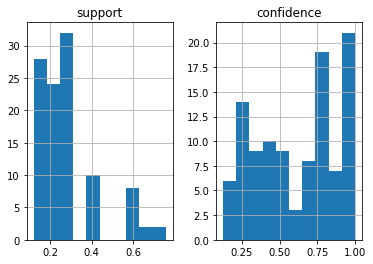

In [12]:
rules[['support','confidence']].hist()

array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>],
       [<AxesSubplot:title={'center':'lift'}>, <AxesSubplot:>]],
      dtype=object)

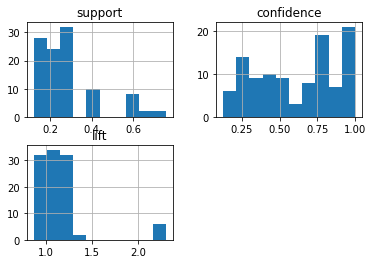

In [13]:
rules[['support','confidence','lift']].hist()

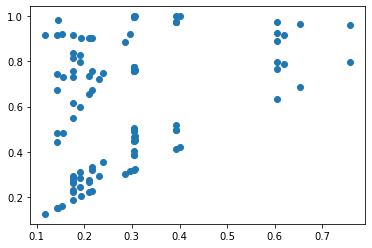

In [14]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'], rules['confidence'])
plt.show()

C:\Users\Computer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


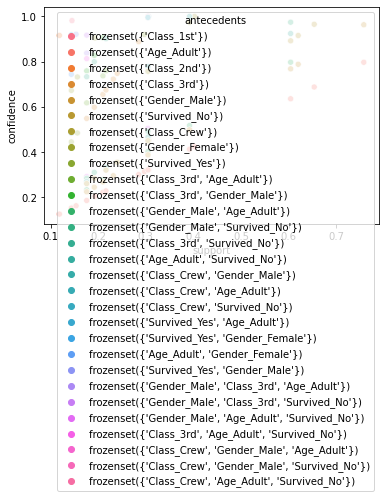

In [15]:
import seaborn as sns
sns.scatterplot ('support','confidence',data=rules,hue='antecedents')
plt.show()